In [1]:
import xgboost as xgb

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("../data2.csv")

In [4]:
df = df.drop(['Name', 'Peak Season', 'Before Season months', 'Months left for End of Season', 'Gender', 'TransactionCount', 'Unnamed: 0'], axis=1)

x = df.iloc[:,0:12]
y = df.iloc[:,16:17]

In [13]:
x

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sept,Oct,Nov,Dec
0,179018.86,177120.88,174173.55,122734.36,362590.35,365079.62,249214.28,242866.21,436012.52,262280.29,390223.58,294466.47
1,42555.73,63249.06,40379.44,57876.43,49185.06,54559.53,51300.02,108893.08,111362.50,43984.41,60624.84,36887.95
2,135601.47,174790.03,133235.49,209354.95,180334.22,144941.36,158670.00,480330.37,143541.85,131941.96,227762.95,212498.75
3,145533.08,194858.86,517763.56,587363.81,194260.81,238350.12,138048.70,176593.62,230162.27,137788.52,189368.18,160306.05
4,111695.66,92337.60,104144.36,89659.33,145544.96,235337.56,276935.12,108437.74,102481.52,127726.98,120973.45,116962.33
...,...,...,...,...,...,...,...,...,...,...,...,...
995,139740.53,134544.51,125999.43,88232.34,309053.43,382424.13,247519.61,297059.84,378994.13,110848.59,100152.30,148495.98
996,148047.79,112337.95,125866.95,110995.54,124860.01,239777.48,279428.63,215462.67,121346.99,113491.13,168815.89,172984.17
997,231075.16,227730.31,213158.66,147007.86,145156.58,156733.46,213868.72,167817.68,175357.13,156508.09,614548.60,633177.28
998,43010.58,35606.65,59184.78,43935.51,53105.99,34996.00,44865.90,91331.10,96512.01,83445.68,91989.91,64899.35


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)    
y_train_scaled = scaler.fit_transform(y_train)
y_test_scaled = scaler.transform(y_test)

In [7]:
dtrain = xgb.DMatrix(X_train_scaled, label=y_train_scaled)
dtest = xgb.DMatrix(X_test_scaled, label=y_test_scaled)

In [8]:
params = {
    'objective': 'reg:squarederror',
    'max_depth': 5,
    'learning_rate': 0.05,
    'eval_metric': 'rmse'
}

<Figure size 2000x1000 with 0 Axes>

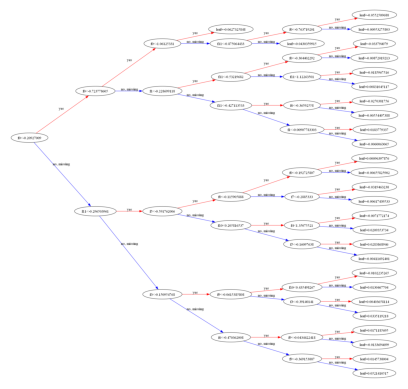

In [9]:
num_rounds = 100
model = xgb.train(params, dtrain, num_rounds)

import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
xgb.plot_tree(model, num_trees=0, rankdir='LR')  # Adjust num_trees to visualize a different tree
plt.savefig('xgboost_tree.png', dpi=1000)
plt.show()

In [10]:
y_pred_prob = model.predict(dtest)

In [11]:

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [12]:
print(mean_squared_error(y_test_scaled,y_pred_prob))
print(mean_absolute_error(y_test_scaled,y_pred_prob))


0.2925375840831746
0.418102251099662
